# Projekt zaliczeniowy | Final Project 
## Klasyfikacja zwierząt | Classification of animals 


### Opis projektu i wybór danych

> Zbiór danych klasyfikacji zwierząt w ogrodach zoologicznych pierwotnie składa się ze 101 zwierząt w zoo i 16 zmiennych z kilkoma cechami, które je opisują (atrybuty), oprócz klasy, do której należy każde zwierzę (cel).

> Ten oryginalny zestaw danych jest często używany w uczeniu maszynowym, ponieważ jest kompletnym, a jednocześnie prostym przykładem ćwiczenia problemów z klasyfikacją w klasach z wieloma etykietami. Ponieważ jednak zapewnia tylko sto wierszy, niektóre algorytmy ML mogą nie działać dobrze. 

> Nie zwracając uwagi na to, że sam zbiór danych jest dość mały, on wszystko jedno jest przydatny do analizy i klasyfikacji za pomocą algorytmów Uczenia Maszynowego, a praktyka klasyfikacji na małych 'set'ach' jest też niezbędna.



Zbiór danych został pobrany ze strony Kaggle.com -> https://www.kaggle.com/datasets/agajorte/zoo-animals-extended-dataset?select=zoo3.csv


*1. Import bibliotek*

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

*2. Wczytujemy dane*

Pierwotnie dane znajdują się w dwóch dataset'ach, więc łaczę je razem 

In [2]:
df = pd.read_csv('../projekt/zoo2.csv')

In [3]:
df1 = pd.read_csv('../projekt/zoo3.csv')

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3


In [5]:
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df = pd.concat([df,df1], ignore_index = True)

In [7]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3


Opis poszczególnych kolumn w datasecie

**animal_name** : nazwa zwierzęcia (unikalna dla każdego egzemplarza);

**hair** : jeśli ma włosy;

**feathers** : jeśli ma pióra;

**eggs** : jeśli składa jaja;

**milk** : jeśli produkuje mleko;

**airborne** : jeśli potrafi latać;

**aquatic** : jeśli jest wodny;

**predator** : jeśli jest to drapieżnik;

**toothed** : jeśli ma zęby;

**backbone** : jeśli ma kręgosłup;

**breathes** : jeśli oddycha;

**venomous** : jeśli wstrzykuje jad;

**fins** : jeśli ma płetwy;

**legs** : liczba nóg (2,4,5,6,8);

**tail** : jeśli ma ogon;

**domestic** : jeśli jest udomowiony;

**catsize** : jeśli jest wielkości kota;

**class_type** : klasa, do której należy (1 to 7): 
> [ 1 - mammal, 2 - bird, 3 - reptile, 4 - fish, 5 - amphibian, 6 - bug, 7 - invertebrae];

> [1 - ssak, 2 - ptak, 3 - gad, 4 - ryba, 5 - płaz, 6 - pluskwa, 7 - bezkręgowiec]

In [8]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.203540,0.176991,0.831858,0.168142,0.256637,0.380531,0.389381,0.469027,0.761062,0.849558,0.132743,0.159292,2.955752,0.619469,0.132743,0.336283,3.637168
std,0.404424,0.383361,0.375658,0.375658,0.438723,0.487680,0.489782,0.501263,0.428334,0.359097,0.340809,0.367578,2.221604,0.487680,0.340809,0.474541,1.950558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df.shape

(113, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.0+ KB


*3. EDA i wizualizacja danych*

In [12]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
109,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
110,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
111,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [13]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [14]:
print(df['class_type'].value_counts())

3    20
2    20
1    19
6    17
4    15
5    12
7    10
Name: class_type, dtype: int64


Spawdzenie, czy dataset jest sbalansowany

Text(0.5, 1.0, 'The Distribution of Classes')

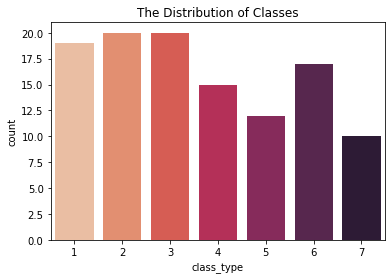

In [15]:
sns.countplot(data = df, x = 'class_type', palette = 'rocket_r')
plt.title("The Distribution of Classes")

/dataset jest w miarę sbalansowany co znaczy, że można wykonywać podalszą analizę/

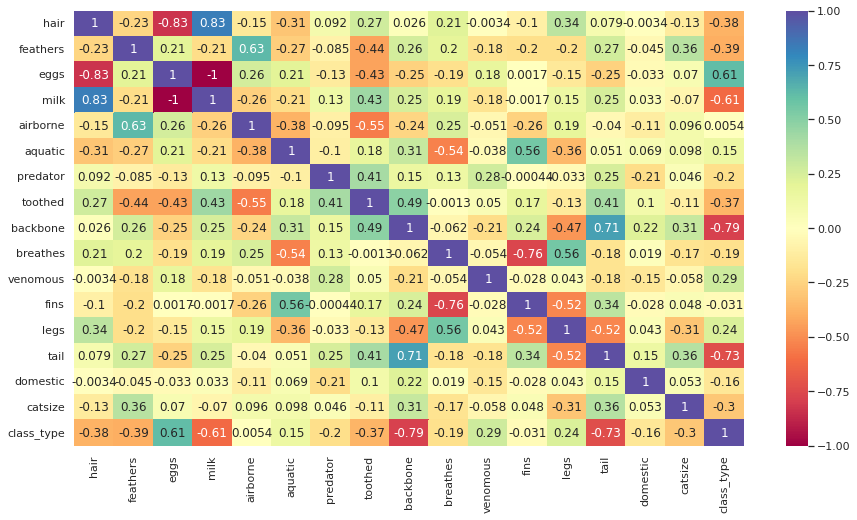

In [16]:
corr = df.corr()
sns.set(rc = {"figure.figsize": (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "Spectral")

In [18]:
df_col = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

Dystrybucja danych ze względu na każdą kolumnę (feature)

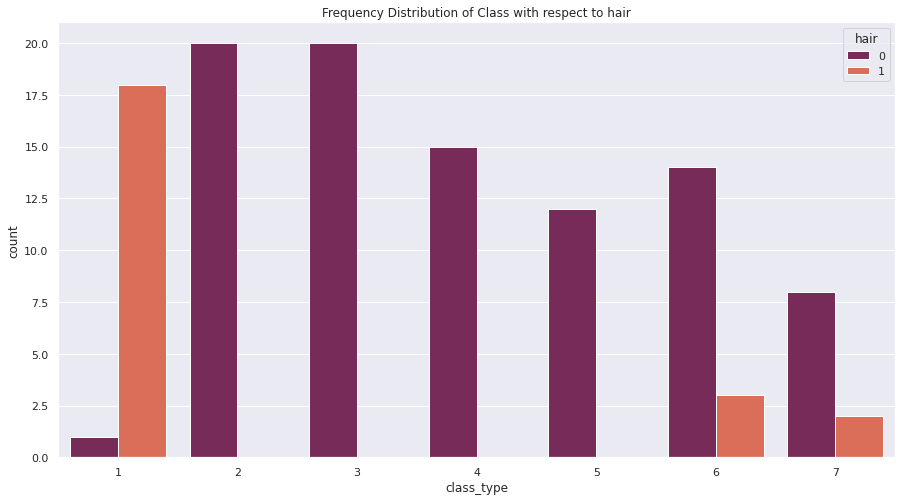

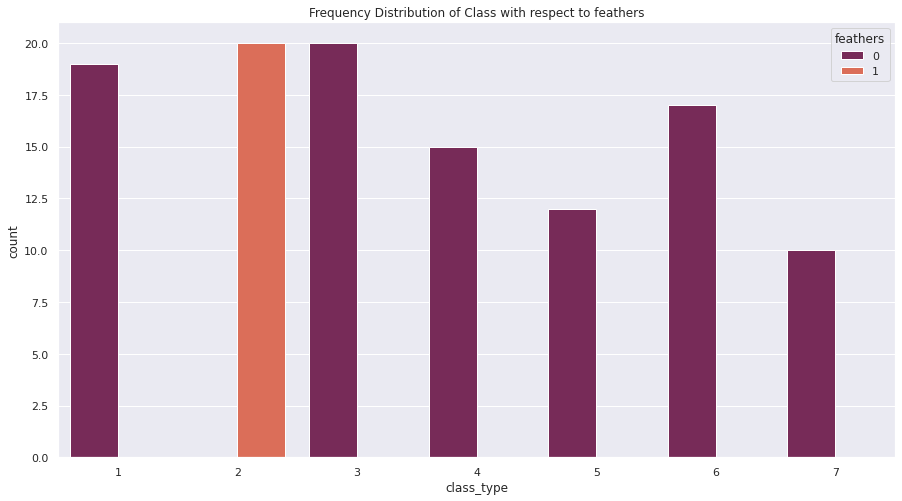

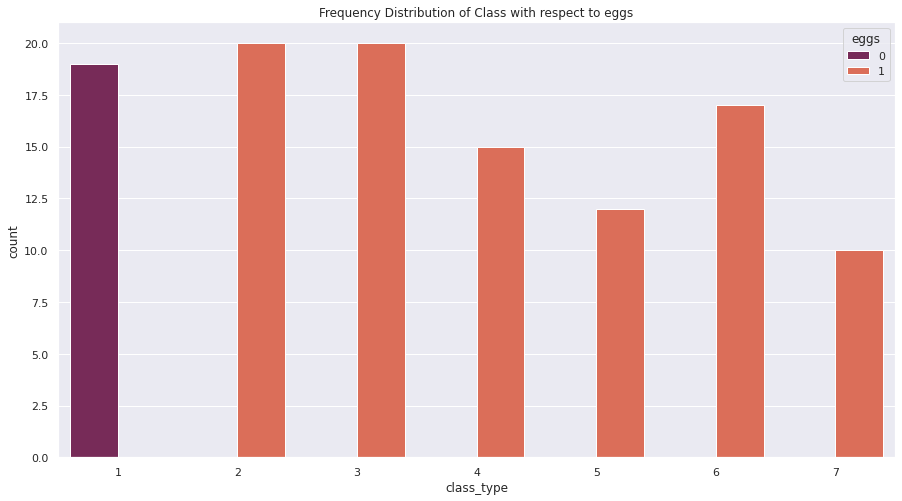

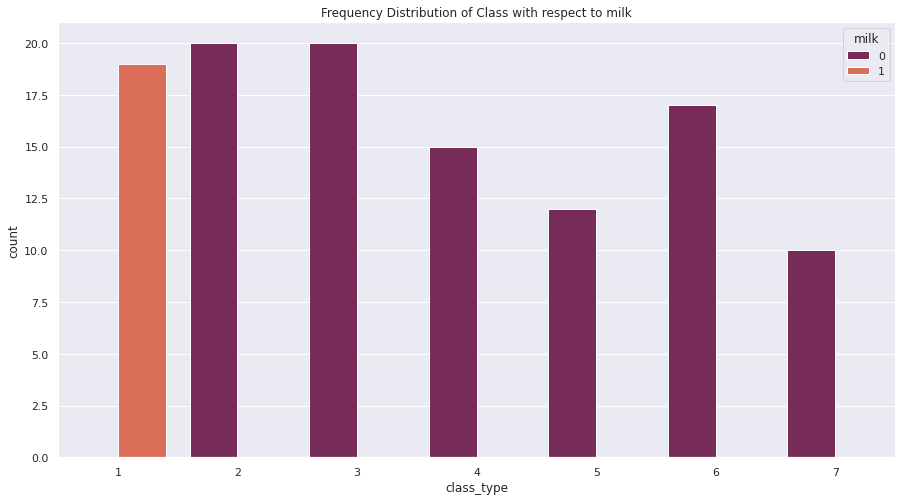

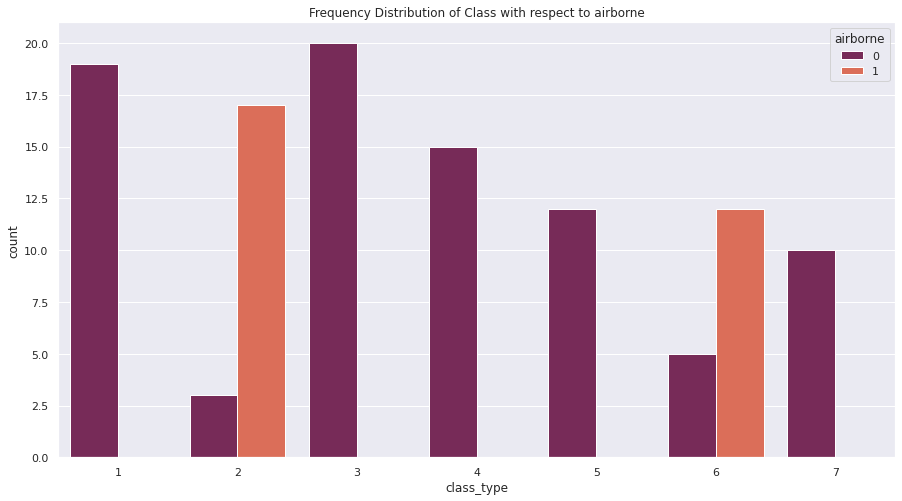

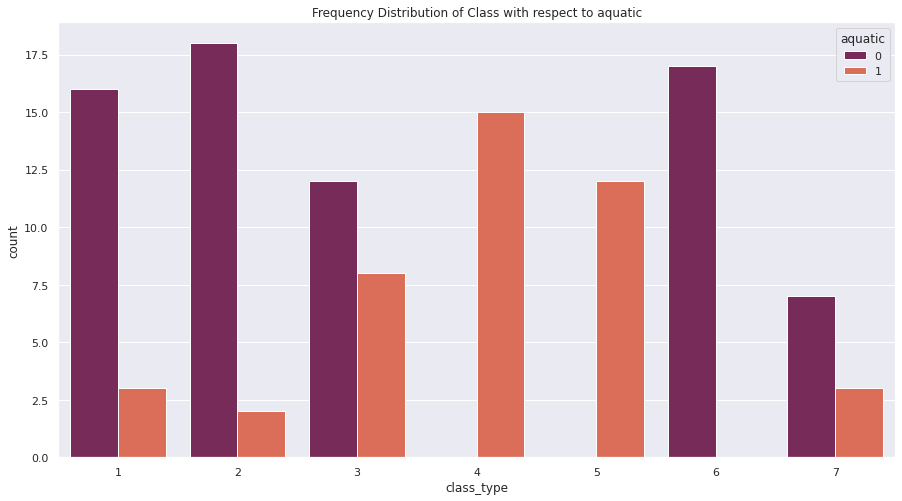

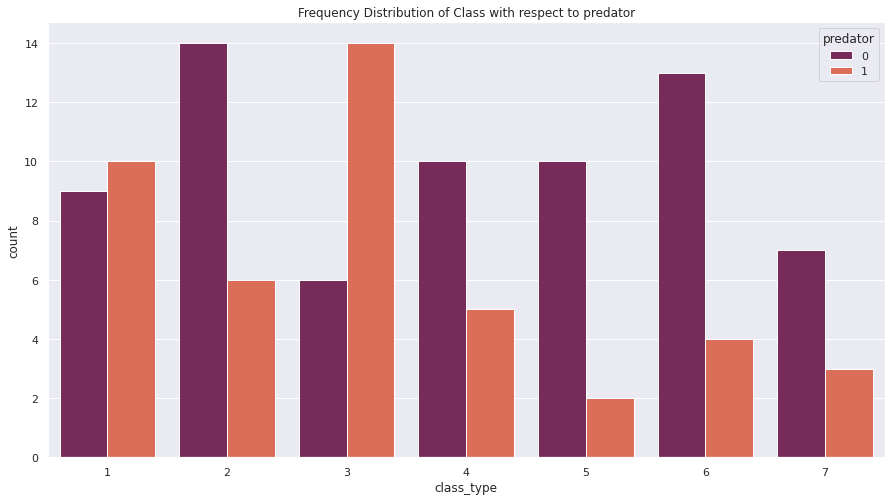

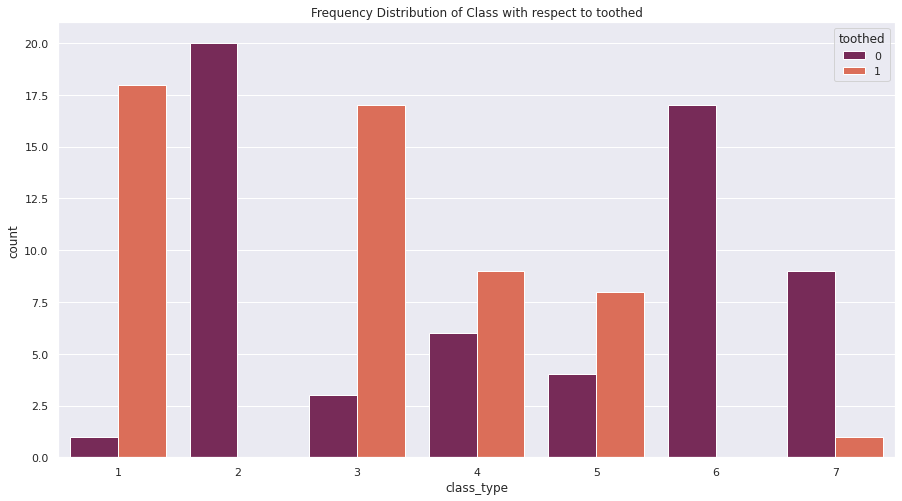

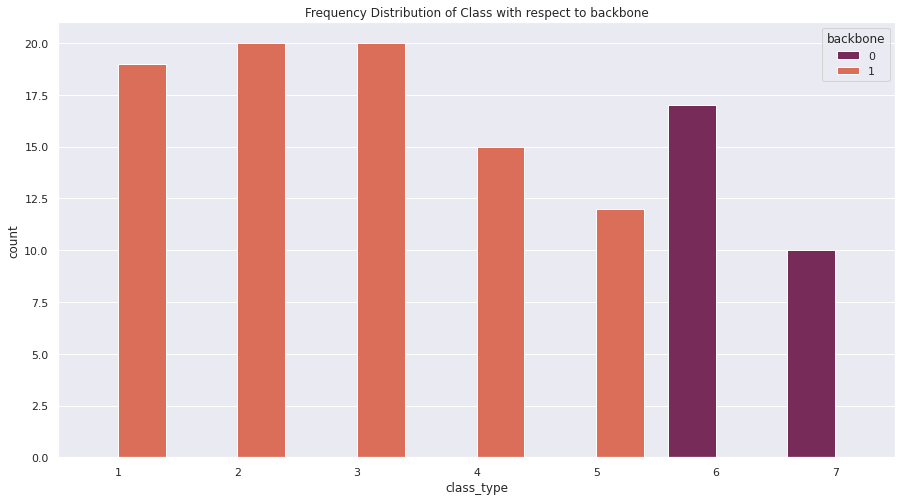

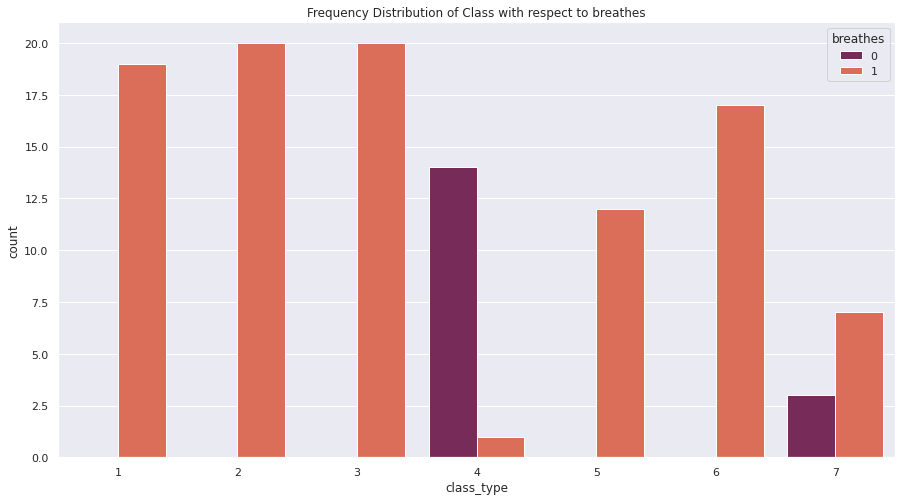

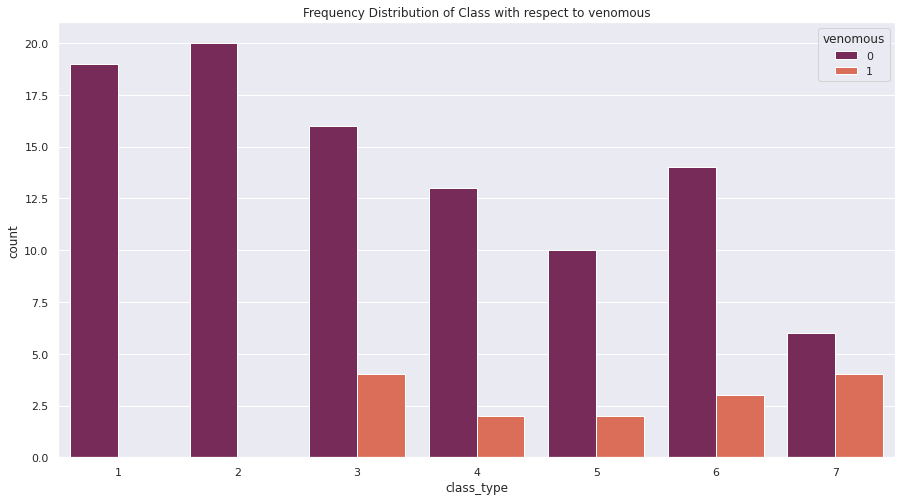

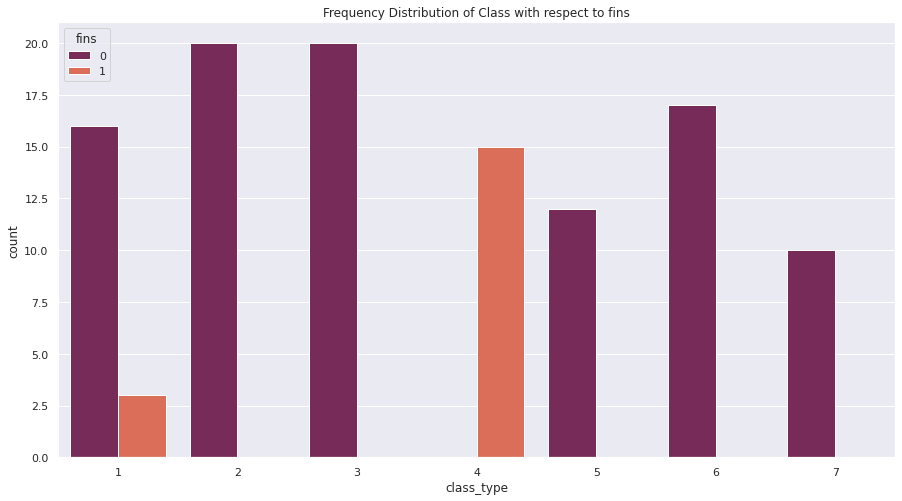

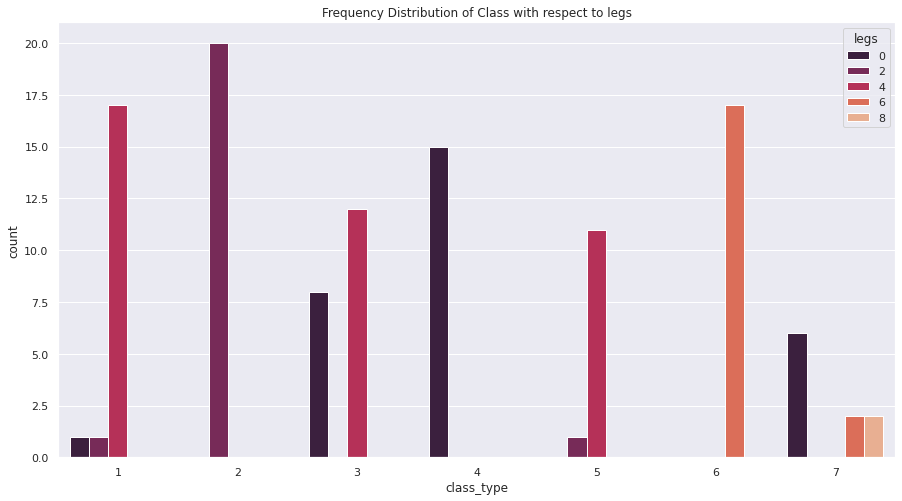

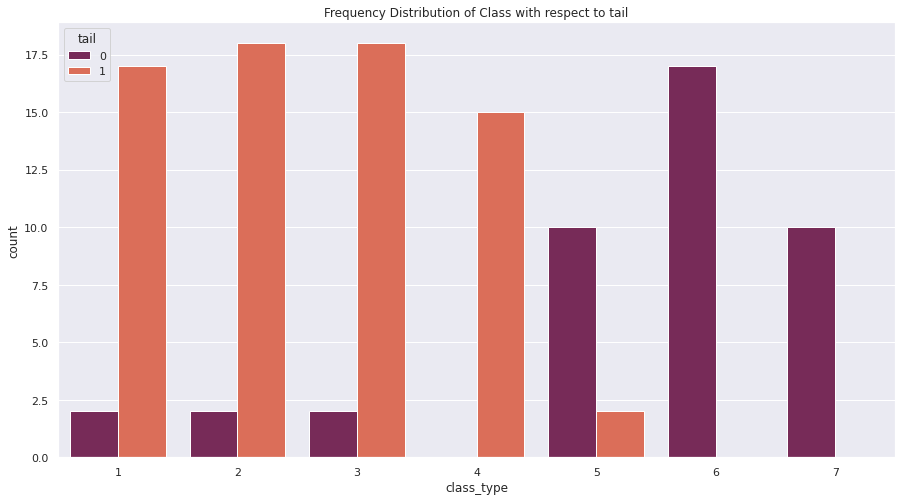

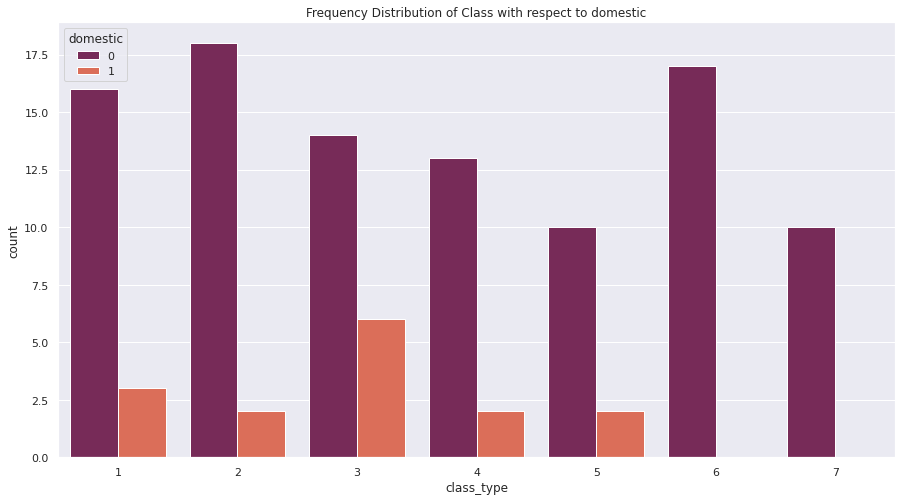

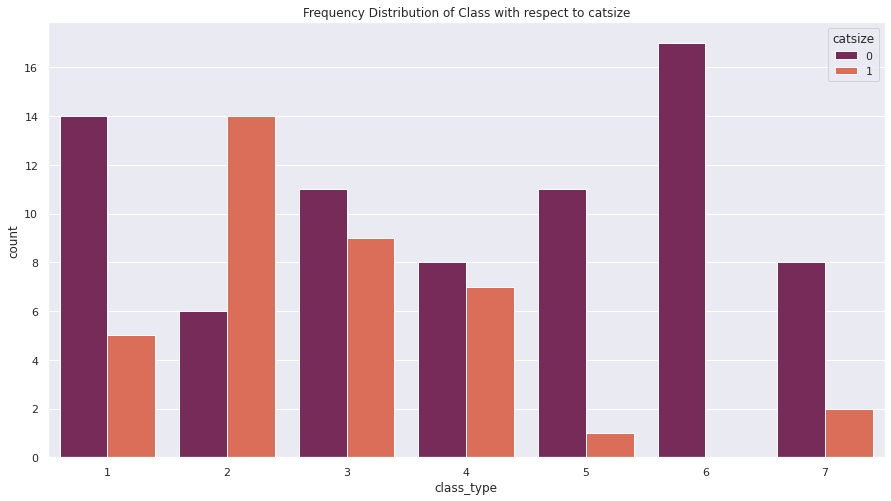

In [19]:
for hue in df_col:  
    sns.countplot(data = df, x = "class_type", hue = hue, palette = "rocket")
    plt.title(f"Frequency Distribution of Class with respect to {hue}")
    plt.show()

Wniosek: w tej bazie danych nie ma brakujących danych, a także danych odstających. 

*4. Train test split*

In [20]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [21]:
X, y = df.iloc[:,1:].values, df.iloc[:, 17].values

In [22]:
print(y)

[3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 7 7
 7 7]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=42)

*5. Pipelines*

Dla takiego małego zbioru danych wybrałam 3 modele, które mogą pokazać swoje działanie w problemie klasyfikacyjnym najlepiej:


*   SVC (Support Vector Classifier);
*   LogReg (Logistic Regression);
*   KNN (K-Neighbors Classifier).

I tworzę Pipeliny dla każdego z klasyfikatorów.




In [24]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [26]:
accuracy = pipe.score(X_test, y_test)

In [27]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(random_state = 1))])

In [28]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=1))])

In [29]:
accuracy1 = pipe1.score(X_test, y_test)

In [30]:
pipe2 = Pipeline([('scaler', StandardScaler()), 
                          ('knn', KNeighborsClassifier(n_neighbors = 3))])

In [31]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [32]:
accuracy2 = pipe2.score(X_test, y_test)

In [33]:
print(f'The accuracy of the first model is {accuracy:.2f}')
print(f'The accuracy of the second model is {accuracy1:.2f}')
print(f'The accuracy of the third model is {accuracy2:.2f}')

The accuracy of the first model is 0.94
The accuracy of the second model is 0.97
The accuracy of the third model is 0.94


Jak widać we wstępnym modelowaniu, accuracy dwóch modeli jest ta sama. To jest zagwozdką związana z małym zbiorem danych.

*6. K-Fold cross validation*

Następnym krokiem jest stworzenie k-krotny sprawdzian krzyżowego na danych. Dla jeszcze lepszego sprawdzenia 'accuracy' znów podzieliłam zbiór i określiłam 'target'.

In [104]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# K-fold for SVC Pipeline

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop over the splits of the data and train/evaluate a model
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print(f"Fold Accuracy: {score:.2f}")

Fold Accuracy: 0.87
Fold Accuracy: 0.91
Fold Accuracy: 0.96
Fold Accuracy: 0.91
Fold Accuracy: 0.77


In [105]:
# K-Fold for LogReg Pipeline

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop over the splits of the data and train/evaluate a model
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    pipe1.fit(X_train, y_train)
    score = pipe1.score(X_test, y_test)
    print(f"Fold Accuracy: {score:.2f}")

Fold Accuracy: 0.87
Fold Accuracy: 0.96
Fold Accuracy: 0.96
Fold Accuracy: 0.91
Fold Accuracy: 0.82


In [106]:
# K-fold for KNN Pipeline

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop over the splits of the data and train/evaluate a model
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    pipe2.fit(X_train, y_train)
    score = pipe2.score(X_test, y_test)
    print(f"Fold Accuracy: {score:.2f}")

Fold Accuracy: 0.91
Fold Accuracy: 0.96
Fold Accuracy: 0.96
Fold Accuracy: 0.91
Fold Accuracy: 0.77


*7. Learning curves*

Tworze krzywe uczenia dla każdego modelu.

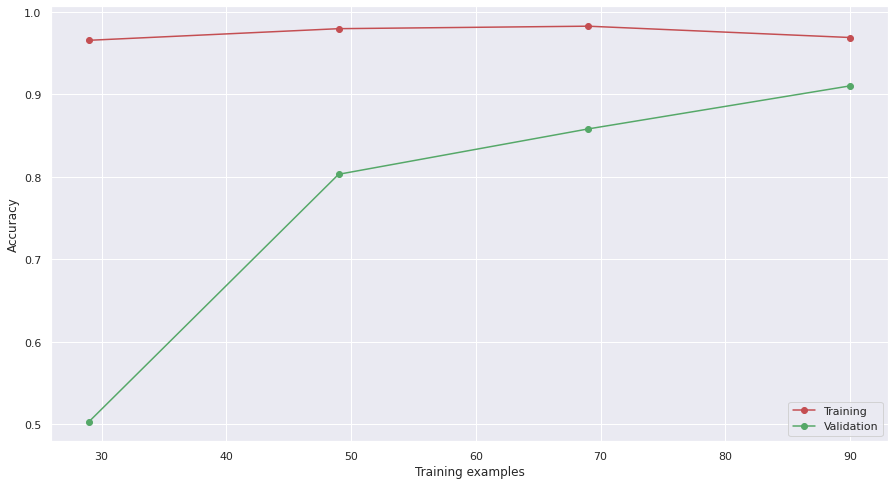

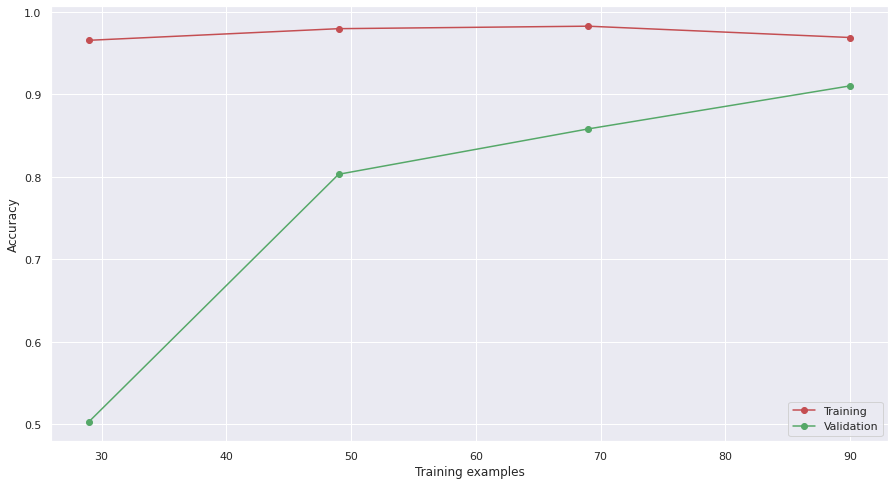

In [107]:
# generate learning curve data for SVC Pipeline model 
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X, y, cv=5, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X, y, cv=5, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

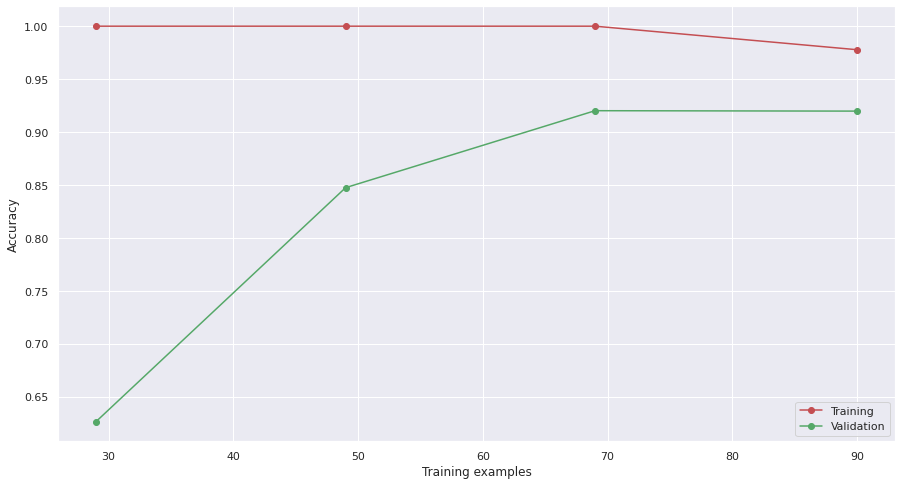

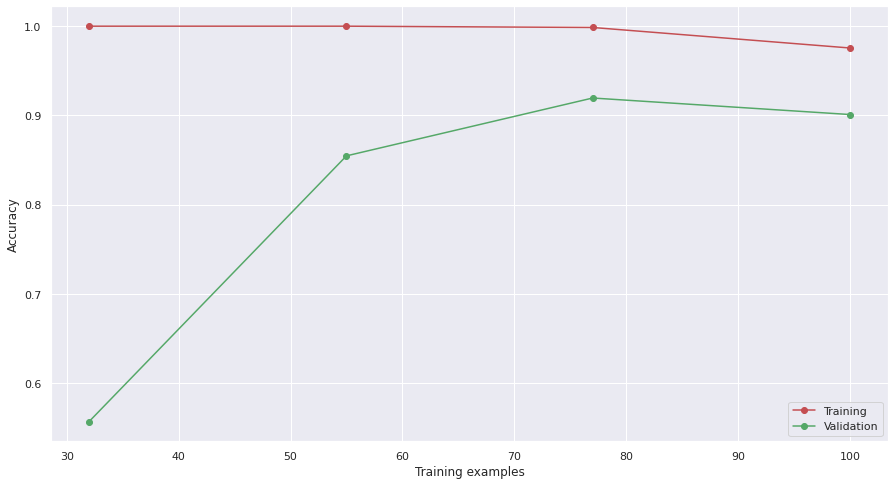

In [108]:
# generate learning curve data for Logreg pipeline model
train_sizes, train_scores, val_scores = learning_curve(
    pipe1, X, y, cv=5, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe1, X, y, cv=9, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

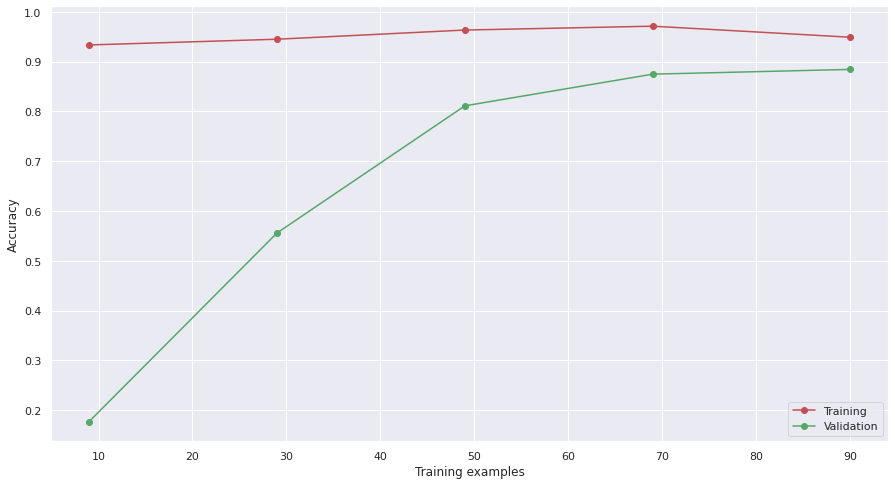

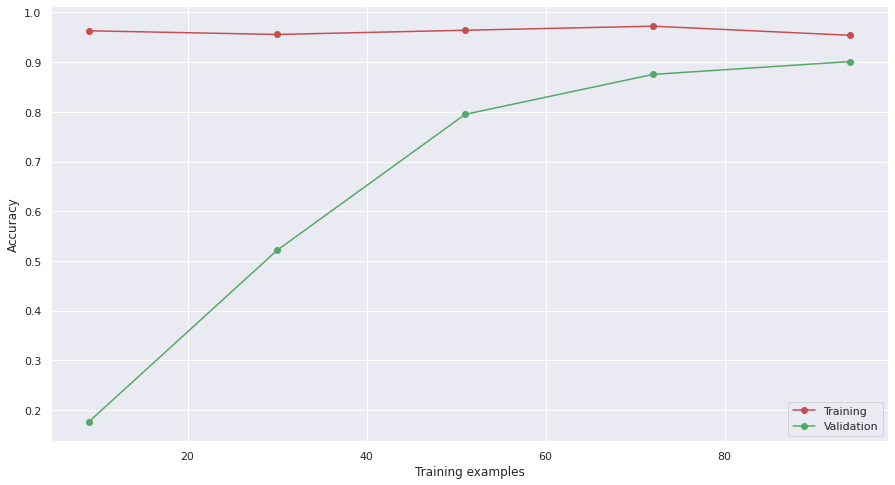

In [109]:
# generate learning curve data for KNN Pipeline
train_sizes, train_scores, val_scores = learning_curve(
    pipe2, X, y, cv=5, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# using 6 training samples
train_sizes, train_scores, val_scores = learning_curve(
    pipe2, X, y, cv=6, scoring="accuracy")

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="r", label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="g", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

*8. Grid Search*


Następnym krokiem jest ulepszenie modelu za pomocą GridSearch, wykonuję to dla każdego z trzech modeli.

######SVC pipeline

In [111]:
pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=1))])

In [112]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [113]:
kernels = ['poly', 'rbf', 'sigmoid','linear']

In [114]:
gamma =  [1, 0.1, 0.01, 0.001]

In [115]:
param_grid = [{'svc__C': param_range,
               'svc__kernel': kernels,
                'svc__gamma':gamma,
                }]

In [116]:
grid = GridSearchCV(estimator = pipe_svc,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = 6,
                    n_jobs = -1)

In [117]:
grid1 = grid.fit(X_train, y_train)

In [118]:
print(f'Best score for SVC pipeline is {grid1.best_score_.round(2)}')

Best score for SVC pipeline is 0.94


In [119]:
print(f'Best parameters for SVC pipeline is {grid1.best_params_}')

Best parameters for SVC pipeline is {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


#####Logistic Regression pipeline

In [120]:
pipe_lg = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(random_state = 1))])

In [121]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [122]:
penalty = ['none', 'l2']

In [123]:
param_grid = [{'log_reg__C': param_range,
               'log_reg__penalty': penalty,
                }]

In [124]:
grid = GridSearchCV(estimator = pipe_lg,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = 6,
                    n_jobs = -1)

In [125]:
grid2 = grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



In [126]:
print(f'Best score for LogReg pipeline is {grid2.best_score_.round(2)}')

Best score for LogReg pipeline is 0.94


In [127]:
print(f'Best parameters for LogReg pipeline is {grid2.best_params_}')

Best parameters for LogReg pipeline is {'log_reg__C': 0.0001, 'log_reg__penalty': 'none'}


#####k-Neighbors Classifier Pipeline

In [129]:
pipe_k = Pipeline([('scaler', StandardScaler()), 
                          ('knn', KNeighborsClassifier())])

In [130]:
n_neighbors = [3, 5, 11, 19]

In [131]:
weights = ['uniform', 'distance']

In [132]:
param_grid = [{'knn__n_neighbors': n_neighbors,
               'knn__weights': weights,
               
                }]

In [133]:
grid = GridSearchCV(estimator = pipe_k,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv = 6,
                    n_jobs = -1)

In [134]:
grid3 = grid.fit(X_train, y_train)

In [135]:
print(f'Best score for KNN pipeline is {grid3.best_score_.round(2)}')

Best score for KNN pipeline is 0.97


In [136]:
print(f'Best parameters for KNN pipeline is {grid3.best_params_}')

Best parameters for KNN pipeline is {'knn__n_neighbors': 5, 'knn__weights': 'distance'}


*9. Cross-validation*

Robienie zagnieżdżonego sprawdzianu krzyżowego dla każdego z modeli.

In [140]:
# cross-val for SVC pipeline 

all_accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)
print(all_accuracies)

[0.78947368 1.         1.         1.         0.88888889]


In [142]:
print (f"Mean of Accuracy : {all_accuracies.mean().round(2)}") # Average of all accuracies
print (f"Standard Deviation of Accuracy : {all_accuracies.std().round(2)}") # Standard Deviation of all accuracies

Mean of Accuracy : 0.94
Standard Deviation of Accuracy : 0.08


In [143]:
# cross-val for Logreg pipeline 

all_accuracies1 = cross_val_score(estimator = pipe1, X = X_train, y = y_train, cv = 5)
print(all_accuracies1)

[0.78947368 1.         1.         1.         0.88888889]


In [144]:
print (f"Mean of Accuracy : {all_accuracies1.mean().round(2)}") # Average of all accuracies
print (f"Standard Deviation of Accuracy : {all_accuracies1.std().round(2)}") # Standard Deviation of all accuracies

Mean of Accuracy : 0.94
Standard Deviation of Accuracy : 0.08


In [145]:
# cross-val for KNN pipeline 

all_accuracies2 = cross_val_score(estimator = pipe2, X = X_train, y = y_train, cv = 5)
print(all_accuracies2)

[0.89473684 0.94444444 1.         0.94444444 0.88888889]


In [146]:
print (f"Mean of Accuracy : {all_accuracies2.mean().round(2)}") # Average of all accuracies
print (f"Standard Deviation of Accuracy : {all_accuracies2.std().round(2)}") # Standard Deviation of all accuracies

Mean of Accuracy : 0.93
Standard Deviation of Accuracy : 0.04


*10. Confusion Matrix*

Tworzenie i wizualizacja macierzy pomyłek dla każdego modelu.

In [157]:
y_pred1 = grid1.predict(X_test)

In [158]:
conf1 = confusion_matrix(y_true = y_test,
                         y_pred = y_pred1)

In [159]:
print(conf1)

[[4 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 3 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 2 0 3 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]]


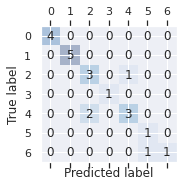

In [160]:
# Confusion Matrix for SVC grid
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf1, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(conf1.shape[0]):
  for j in range(conf1.shape[1]):
    ax.text(x=j, y=i,
            s=conf1[i,j],
            va= 'center', 
            ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [161]:
y_pred2 = grid2.predict(X_test)

In [162]:
conf2 = confusion_matrix(y_true = y_test,
                         y_pred = y_pred2)

In [163]:
print(conf2)

[[4 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 2 0 2 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 3 0 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]]


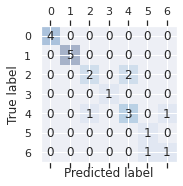

In [164]:
# Confusion Matrix for LogReg Grid
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf2, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(conf2.shape[0]):
  for j in range(conf2.shape[1]):
    ax.text(x=j, y=i,
            s=conf2[i,j],
            va= 'center', 
            ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [165]:
y_pred3 = grid3.predict(X_test)

In [166]:
conf3 = confusion_matrix(y_true = y_test,
                         y_pred = y_pred3)

In [167]:
print(conf3)

[[4 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 2 0 2 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]]


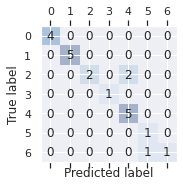

In [168]:
#Confusion Matrix for KNN Grid
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf3, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(conf3.shape[0]):
  for j in range(conf3.shape[1]):
    ax.text(x=j, y=i,
            s=conf3[i,j],
            va= 'center', 
            ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

*11. Precision, recall & F1 score*

Ocena innych metryk modeli dla każdego z klasyfikatorów. W tym przypadku używam presicion, recall i f1 score.

In [169]:
print('Precision of SVC pipeline is: %3f' % precision_score(y_true = y_test, y_pred = y_pred1, average = 'micro'))

Precision of SVC pipeline is: 0.818182


In [170]:
print('Precision of LR pipeline is: %3f' % precision_score(y_true = y_test, y_pred = y_pred2, average = 'micro'))

Precision of LR pipeline is: 0.772727


In [171]:
print('Precision of KNN pipeline is: %3f' % precision_score(y_true = y_test, y_pred = y_pred3, average = 'micro'))

Precision of KNN pipeline is: 0.863636


In [172]:
print('Recall of SVC pipeline is: %3f' % recall_score(y_true = y_test, y_pred = y_pred1, average = 'micro'))

Recall of SVC pipeline is: 0.818182


In [173]:
print('Recall of LR pipeline is: %3f' % recall_score(y_true = y_test, y_pred = y_pred2, average = 'micro'))

Recall of LR pipeline is: 0.772727


In [174]:
print('Recall of KNN pipeline is: %3f' % recall_score(y_true = y_test, y_pred = y_pred3, average = 'micro'))

Recall of KNN pipeline is: 0.863636


In [175]:
print('F1-score of SVC pipeline is: %3f' % f1_score(y_true = y_test, y_pred = y_pred1, average = 'micro'))

F1-score of SVC pipeline is: 0.818182


In [176]:
print('F1-score of LR pipeline is: %3f' % f1_score(y_true = y_test, y_pred = y_pred2, average = 'micro'))

F1-score of LR pipeline is: 0.772727


In [177]:
print('F1-score of KNN pipeline is: %3f' % f1_score(y_true = y_test, y_pred = y_pred3, average = 'micro'))

F1-score of KNN pipeline is: 0.863636


Wniosek: można zauważyć, że inne metryki oceny są takie same. To może być problemem i jest on głównie związany z tym, że zbiór danych jest dość mały, jednak możemy i tak zauważyć różnice w 'accuracy_score', czyli wnioskujemy głównie z tej metryki. 

*12. Finalne porównanie modeli*

In [178]:
x = ["Support Vector Classifier",
     "Linear Regression",
     "K-Neighbors Classifier"]

y = [grid1.best_score_.round(2),
     grid2.best_score_.round(2),
     grid3.best_score_.round(2)]

fig = px.bar(x=x, y=y, color=x, title="Model Comparison - Model Accuracy",
             labels={
                'x': 'Model',
                'y': 'Model Accuracy'},
             width = 600,
             height = 400)

fig.show()

Wniosek: jak możemy zauważyć za wykresem wyżej, najlepsza dokładność modelu klasyfikacji jest w przypadku używania klasyfikatora K-Neighbors, ale ta liczba nie jest znacznie wyższa od dokładności klasyfikatorów SVC i Logistic regression, więc na takim małym zbiorze danych najlepiej rozwiązuje problem klasyfikacji KNN Pipeline, chociaż można stosować i inne klasyfikatory.

Głównym problemem i dalej jest mała liczba danych, co sprawia nie do końca poprawne działanie niektórych algorytmów, więc dla ulepszenia danej pracy należy dodawać więcej próbek do już istniejącego zbioru danych.

Ten problem też sprawia to, że oprócz metryki 'accuracy' trudno określić inne metryki, ponieważ dla każdego modelu finalne liczby tych metryk są takie same, nie zwracając uwagi na to, że sam dataset jest w pełni sbalansowany.